# <center>豆瓣影评采集与分析</center>

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json
import time
import random

In [2]:

# 请求地址
url = 'https://movie.douban.com/subject/32659890/comments'
# 反爬措施
headers = {
    'User-Agent': 'Chrome/65.0.3325.146 Safari/537.36',
    'Referer':'https://movie.douban.com/subject/32659890/',
    'Cookie': 'your_own_cookie' # 写自己登录到豆瓣后的cookie信息
}
user_agents = ['Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20130406 Firefox/23.0',
               'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:18.0) Gecko/20100101 Firefox/18.0',
               'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/533+ \(KHTML, like Gecko) Element Browser 5.0',
               'IBM WebExplorer /v0.94', 'Galaxy/1.0 [en] (Mac OS X 10.5.6; U; en)',
               'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
               'Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.14',
               'Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) \Version/6.0 Mobile/10A5355d Safari/8536.25',
               'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) \Chrome/28.0.1468.0 Safari/537.36',
               'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0; TheWorld)']

# 请求参数
params_a = {'start': 0, 'limit': 20, 'status': 'P', 'sort': "new_score"}
# 请求数据
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0"}
r = requests.get(url, params=params_a, headers=headers)

In [3]:
def parse_html(html):
    results = list()
    soup = BeautifulSoup(html, 'html.parser')
    comment_items = soup.find_all(class_="comment-item")
    for comment_item in comment_items:
        cmt_id = comment_item['data-cid']
        comment_vote = comment_item.find("span", class_="comment-vote")
        cmt_thumbs = comment_vote.span.string
        comment_info = comment_item.find("span", class_="comment-info")
        infos = comment_info.find_all("span")
        if len(infos) == 4:
            cmt_star = re.findall(r'[0-9]+', infos[1]['class'][0])[0]
            cmt_time = infos[2].string.strip()
        else:
            cmt_star = '50'
            cmt_time = infos[1].string.strip()
        comment_content = comment_item.find("p", class_="comment-content")
        cmt_cont = comment_content.text.strip()
        item = {}
        item['cmt_id'] = cmt_id  # 编号
        item['cmt_star'] = cmt_star  # 评分
        item['cmt_time'] = cmt_time  # 时间
        item['cmt_cont'] = cmt_cont  # 评论
        item['cmt_thumbs'] = cmt_thumbs  # 点赞数
        results.append(item)
    return results
parse_html(r.text)
index = random.randint(0, 9)
user_agent = user_agents[index]
def request_url(url, params):
    index = random.randint(0, 9)
    user_agent = user_agents[index]
    headers = {'User-Agent': user_agent, 'Referer': 'https://movie.douban.com/subject/32659890/'}
    r = requests.get(url, params=params, headers=headers)
    print(r.url)
    print(r.status_code)
    if r.status_code == 200:
        return r.text
    else:
        return ''

In [4]:
# 请求地址
url = 'https://movie.douban.com/subject/32659890/comments'

# 请求参数
params_a = {'start': 0, 'limit': 20, 'status': 'P', 'sort': "new_score"}

html = request_url(url, params_a)
html

https://movie.douban.com/subject/32659890/comments?start=0&limit=20&status=P&sort=new_score
200


'<!DOCTYPE html>\n<html lang="zh-CN" class="ua-windows ua-ie10">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n\n我和我的祖国 短评\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2006 01:00:00 GMT">\n    \n    <meta name="keywords" content="我和我的祖国,影讯,排片,放映时间,电影票价,在线购票"/>\n    <meta name="description" content="我和我的祖国短评" />\n    <meta name="mobile-agent" content="format=html5; url=https://m.douban.com/movie/subject/32659890/comments"/>\n\n    <link rel="apple-touch-icon" href="https://img1.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">\n    <link href="https://img1.doubani

#### 爬取n个页面

In [5]:
import time

datas1 = []
for i in range(0, 11):
    print('第' + str(i + 1) + '页评论爬取中……')
    params_a = {'start': i * 20, 'limit': 20, 'status': 'P', 'sort': "new_score"}
    html = request_url(url, params_a)
    datas1.extend(parse_html(html))
    print('第' + str(i + 1) + '页评论爬取完成')
    time.sleep(3)

第1页评论爬取中……
https://movie.douban.com/subject/32659890/comments?start=0&limit=20&status=P&sort=new_score
200
第1页评论爬取完成
第2页评论爬取中……
https://movie.douban.com/subject/32659890/comments?start=20&limit=20&status=P&sort=new_score
200
第2页评论爬取完成
第3页评论爬取中……
https://movie.douban.com/subject/32659890/comments?start=40&limit=20&status=P&sort=new_score
200
第3页评论爬取完成


KeyboardInterrupt: 

In [ ]:
len(datas1)

In [ ]:
import json

# 数据保存
file_name = 'data/commet_all.json'
with open(file_name, 'w', encoding='utf-8') as file_object:
    for item in datas1:
        file_object.write(json.dumps(item, ensure_ascii=False))
        file_object.write('\n')

In [ ]:
# 数据加载
file_name = 'data/commet_all.json'
with open(file_name, 'r', encoding='utf-8') as file_object:
    for line in file_object:
        item = json.loads(line)
        print(item)

### 1.2.2 好评

In [ ]:
# 爬取11个页面
import time

datas2 = []
for i in range(0, 11):
    print('第' + str(i + 1) + '页评论爬取中……')
    params_h = {'percent_type': "h", 'start': i * 20, 'limit': 20, 'status': 'P', 'sort': "new_score"}
    html = request_url(url, params_h)
    datas2.extend(parse_html(html))
    print('第' + str(i + 1) + '页评论爬取完成')
    time.sleep(5)

In [ ]:
len(datas2)

In [ ]:
import json

# 数据保存
file_name = 'data/commet_h.json'
with open(file_name, 'w', encoding='utf-8') as file_object:
    for item in datas2:
        file_object.write(json.dumps(item, ensure_ascii=False))
        file_object.write('\n')

### 1.2.3 一般

In [ ]:
# 爬取11个页面
import time

datas3 = []
for i in range(0, 11):
    print('第' + str(i + 1) + '页评论爬取中……')
    params_m = {'percent_type': "m", 'start': i * 20, 'limit': 20, 'status': 'P', 'sort': "new_score"}
    html = request_url(url, params_m)
    datas3.extend(parse_html(html))
    print('第' + str(i + 1) + '页评论爬取完成')
    time.sleep(3)

In [ ]:
len(datas3)

In [ ]:
import json

# 数据保存
file_name = 'data/commet_m.json'
with open(file_name, 'w', encoding='utf-8') as file_object:
    for item in datas3:
        file_object.write(json.dumps(item, ensure_ascii=False))
        file_object.write('\n')

### 1.2.4 差评

In [ ]:
# 爬取11个页面
import time

datas4 = []
for i in range(0, 11):
    print('第' + str(i + 1) + '页评论爬取中……')
    params_l = {'percent_type': "l", 'start': i * 20, 'limit': 20, 'status': 'P', 'sort': "new_score"}
    html = request_url(url, params_l)
    datas4.extend(parse_html(html))
    print('第' + str(i + 1) + '页评论爬取完成')
    time.sleep(3)

In [ ]:
len(datas4)

In [ ]:
import json

# 数据保存
file_name = 'data/commet_l.json'
with open(file_name, 'w', encoding='utf-8') as file_object:
    for item in datas4:
        file_object.write(json.dumps(item, ensure_ascii=False))
        file_object.write('\n')

## 2. 评论分析

In [108]:
import jieba
import numpy as np
import pandas as pd
from gensim import corpora, models
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 2.1 评分情况

In [109]:
df_a = pd.read_json('data/commet_all.json', lines=True, encoding='utf-8')
df_a.head()

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs
0,1975231302,40,2019-09-29 23:22:00,《北京你好》最佳。宁浩竟然能把北京奥运会如此盛大的赛事拍得那么接地气，而且笑中带泪。\n以一...,9843
1,1973569718,40,2019-09-28 21:20:56,旗杆上升起的不是一块红布，报纸上登载的不是一个名字，电视外错过了情窦，鸟巢里交换了运气。秒针...,7872
2,1976031582,50,2019-09-30 15:00:35,第三段那个小男孩太棒了,11322
3,1973641391,30,2019-09-28 22:02:10,徐峥胜出。陈凯歌是作为总导演自告奋勇地拿了最烂的那个本子吗？,9884
4,1975613912,50,2019-09-30 09:29:42,最喜欢女排那个故事，小演员太可爱了。 优叔一出现感觉过年了。,5832


In [110]:
# 查看数据有没有缺失值
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cmt_id      220 non-null    int64         
 1   cmt_star    220 non-null    int64         
 2   cmt_time    220 non-null    datetime64[ns]
 3   cmt_cont    220 non-null    object        
 4   cmt_thumbs  220 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 8.7+ KB


In [111]:
# 检查缺失值
df_a.isnull().sum()

cmt_id        0
cmt_star      0
cmt_time      0
cmt_cont      0
cmt_thumbs    0
dtype: int64

In [112]:
# 删除缺失值行
df_a.dropna(axis=0, inplace=True)

In [113]:
# 检查重复
sum(df_a.duplicated())

8

In [114]:
# 删除重复
df_a.drop_duplicates(inplace=True)

In [115]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 219
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cmt_id      212 non-null    int64         
 1   cmt_star    212 non-null    int64         
 2   cmt_time    212 non-null    datetime64[ns]
 3   cmt_cont    212 non-null    object        
 4   cmt_thumbs  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.9+ KB


（1）总体评分情况

In [116]:
df_groupby_score = df_a.groupby('cmt_star')
df_groupby_score['cmt_id'].count()

cmt_star
10     7
20    17
30    52
40    77
50    59
Name: cmt_id, dtype: int64

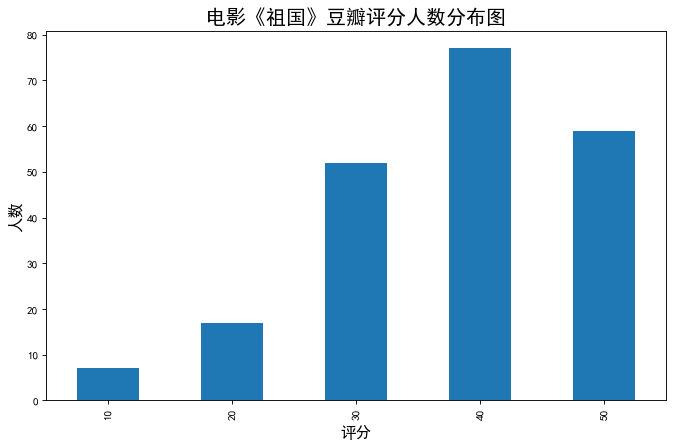

In [117]:
plt.figure(figsize=(10, 6), dpi=80)
df_groupby_score['cmt_id'].count().plot(kind='bar')  #先统计再画图
plt.xlabel('评分', fontsize=14)
plt.ylabel('人数', fontsize=14)
plt.title('电影《祖国》豆瓣评分人数分布图', fontsize=18)
plt.show()

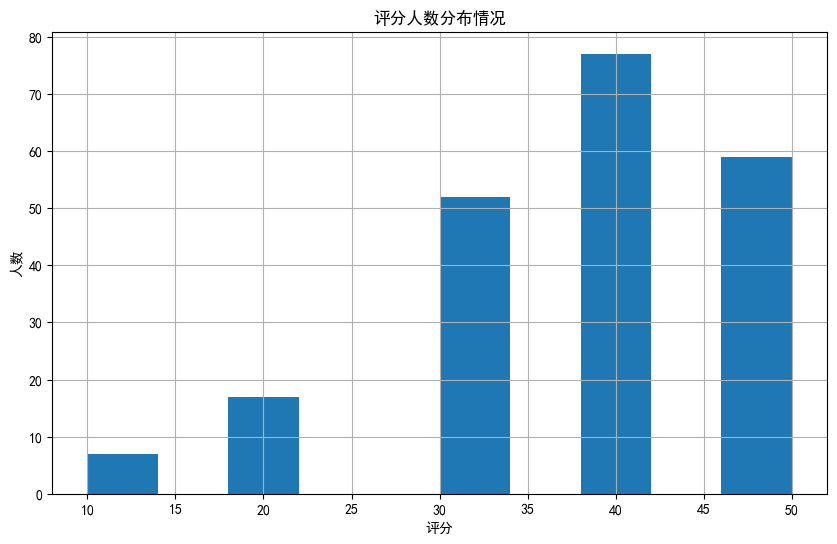

In [119]:
df_a['cmt_star'].hist(bins=10, figsize=(10, 6))  #画图时统计
plt.title('评分人数分布情况')
plt.ylabel('人数')
plt.xlabel('评分');

In [120]:
a_grade = df_a.groupby(['cmt_star']).size() / len(df_a)
a_grade

cmt_star
10    0.033019
20    0.080189
30    0.245283
40    0.363208
50    0.278302
dtype: float64

In [121]:
df_grade = pd.DataFrame(a_grade.values, index=['1星', '2星', '3星', '4星', '5星'], columns=['人数'])
df_grade

,人数
1星,0.033019
2星,0.080189
3星,0.245283
4星,0.363208
5星,0.278302


<AxesSubplot:title={'center':'评分人数分布情况'}, ylabel='人数'>

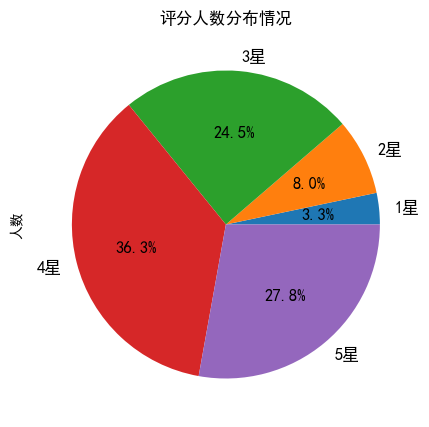

In [125]:
df_grade.loc[:, '人数'].plot.pie(title='评分人数分布情况', autopct='%.1f%%', fontsize=12, figsize=(5, 5))

<AxesSubplot:title={'center':'评分人数分布情况'}, ylabel='人数'>

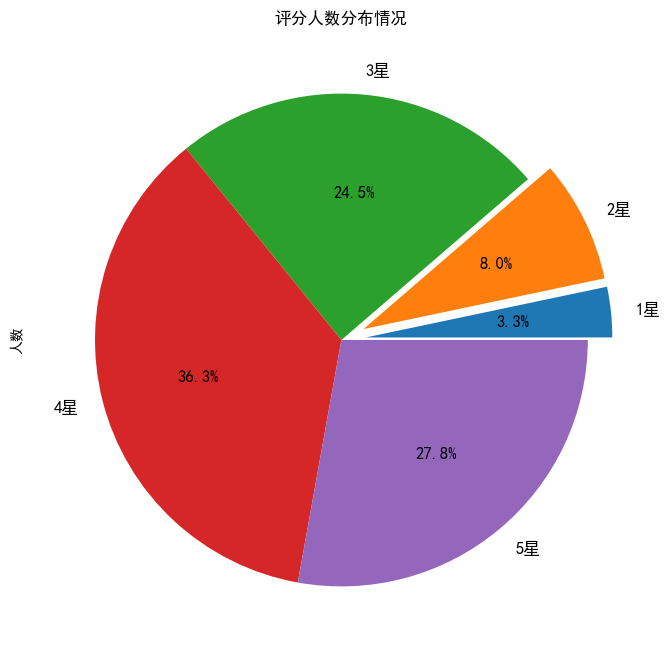

In [126]:
df_grade.loc[:, '人数'].plot.pie(explode=(0.1, 0.1, 0.0, 0, 0.0,), title='评分人数分布情况',
                                 autopct='%.1f%%', fontsize=12, figsize=(8, 8))

（2）分类评分情况

In [127]:
cmt_label = ['差', '中', '好']
df_a['cmt_label'] = pd.cut(df_a['cmt_star'], bins=[0, 20, 30, 50], labels=cmt_label)

In [128]:
df_a

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs,cmt_label
0,1975231302,40,2019-09-29 23:22:00,《北京你好》最佳。宁浩竟然能把北京奥运会如此盛大的赛事拍得那么接地气，而且笑中带泪。\n以一...,9843,好
1,1973569718,40,2019-09-28 21:20:56,旗杆上升起的不是一块红布，报纸上登载的不是一个名字，电视外错过了情窦，鸟巢里交换了运气。秒针...,7872,好
2,1976031582,50,2019-09-30 15:00:35,第三段那个小男孩太棒了,11322,好
3,1973641391,30,2019-09-28 22:02:10,徐峥胜出。陈凯歌是作为总导演自告奋勇地拿了最烂的那个本子吗？,9884,中
4,1975613912,50,2019-09-30 09:29:42,最喜欢女排那个故事，小演员太可爱了。 优叔一出现感觉过年了。,5832,好
...,...,...,...,...,...,...
215,1972900172,50,2019-09-30 00:03:16,有幸看了点映，电影非常值得一看，笑点和泪点都很密集。\n这部电影里面分为七个部分，比较印象深...,47,好
216,1973268342,40,2019-09-28 17:46:05,白昼流星两条线搭的好牵强…,31,好
217,1975809667,30,2019-09-30 12:07:45,《护航》好看奥，最不喜欢《相遇》和《北京你好》,21,中
218,1975430578,30,2019-09-30 02:05:35,陈飞宇刘昊然那part真的有点尬 编剧太扯了,23,中


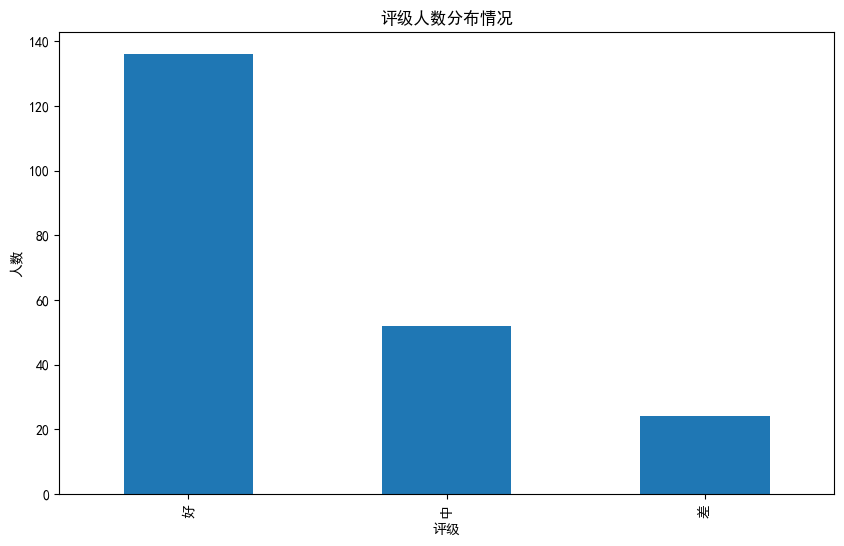

In [129]:
df_a['cmt_label'].value_counts().plot.bar(figsize=(10, 6))
plt.title('评级人数分布情况')
plt.ylabel('人数')
plt.xlabel('评级');

In [130]:
df_a.cmt_label.value_counts()

好    136
中     52
差     24
Name: cmt_label, dtype: int64

<AxesSubplot:title={'center':'评分人数分布情况'}, ylabel='cmt_label'>

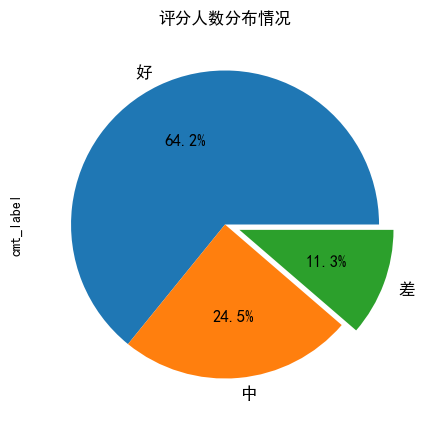

In [132]:
df_a.cmt_label.value_counts().plot.pie(explode=(0, 0, 0.1), title='评分人数分布情况',
                                       autopct='%.1f%%', fontsize=12, figsize=(5, 5))  # label='评级'

（3）评分点赞情况

In [153]:
cmt_thumbs = df_groupby_score['cmt_thumbs'].sum()
cmt_thumbs

cmt_star
10      297
20     3447
30    26097
40    48200
50    34898
Name: cmt_thumbs, dtype: int64

In [154]:
df_thumbs = pd.DataFrame(cmt_thumbs.values, index=['1星', '2星', '3星', '4星', '5星'], columns=['数量'])
df_thumbs

,数量
1星,297
2星,3447
3星,26097
4星,48200
5星,34898


<AxesSubplot:title={'center':'点赞人数分布情况'}, ylabel='数量'>

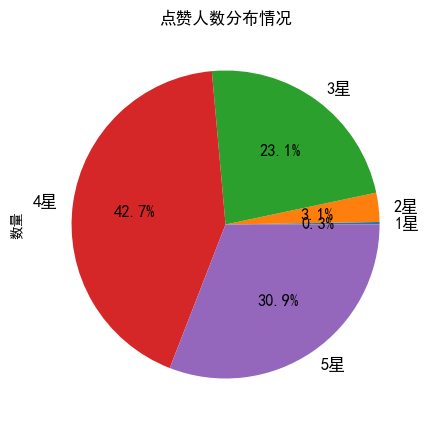

In [155]:
df_thumbs.loc[:, '数量'].plot.pie(title='点赞人数分布情况', autopct='%.1f%%', fontsize=12, figsize=(5, 5))

（4）评论时间情况

In [136]:
df_a.groupby(['cmt_time']).size()

cmt_time
2019-09-24 18:19:15    1
2019-09-25 17:13:56    1
2019-09-28 09:00:19    1
2019-09-28 14:40:59    1
2019-09-28 14:46:54    1
                      ..
2020-02-05 21:39:47    1
2020-02-06 10:02:17    1
2020-05-13 19:25:47    1
2020-12-12 02:05:03    1
2021-12-22 23:40:48    1
Length: 212, dtype: int64

In [137]:
df_a['cmt_time'] = df_a['cmt_time'].astype(str)

<AxesSubplot:xlabel='cmt_time'>

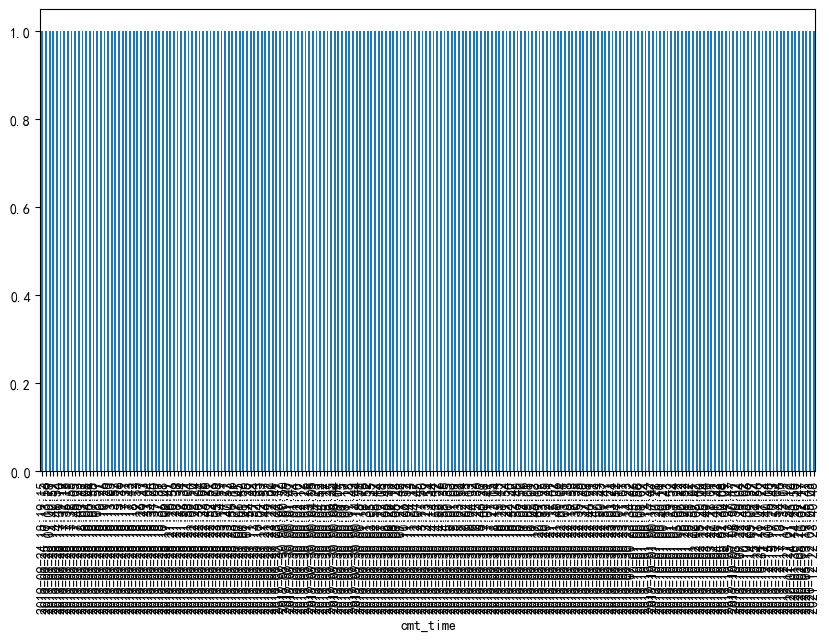

In [138]:
df_a.groupby(['cmt_time']).size().plot.bar(figsize=(10, 6))  # plt.xticks(rotation=45)

In [139]:
# 按月统计
df_a['cmt_month'] = df_a['cmt_time'].apply(lambda x: x[0:7])
df_a

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs,cmt_label,cmt_month
0,1975231302,40,2019-09-29 23:22:00,《北京你好》最佳。宁浩竟然能把北京奥运会如此盛大的赛事拍得那么接地气，而且笑中带泪。\n以一...,9843,好,2019-09
1,1973569718,40,2019-09-28 21:20:56,旗杆上升起的不是一块红布，报纸上登载的不是一个名字，电视外错过了情窦，鸟巢里交换了运气。秒针...,7872,好,2019-09
2,1976031582,50,2019-09-30 15:00:35,第三段那个小男孩太棒了,11322,好,2019-09
3,1973641391,30,2019-09-28 22:02:10,徐峥胜出。陈凯歌是作为总导演自告奋勇地拿了最烂的那个本子吗？,9884,中,2019-09
4,1975613912,50,2019-09-30 09:29:42,最喜欢女排那个故事，小演员太可爱了。 优叔一出现感觉过年了。,5832,好,2019-09
...,...,...,...,...,...,...,...
215,1972900172,50,2019-09-30 00:03:16,有幸看了点映，电影非常值得一看，笑点和泪点都很密集。\n这部电影里面分为七个部分，比较印象深...,47,好,2019-09
216,1973268342,40,2019-09-28 17:46:05,白昼流星两条线搭的好牵强…,31,好,2019-09
217,1975809667,30,2019-09-30 12:07:45,《护航》好看奥，最不喜欢《相遇》和《北京你好》,21,中,2019-09
218,1975430578,30,2019-09-30 02:05:35,陈飞宇刘昊然那part真的有点尬 编剧太扯了,23,中,2019-09


<AxesSubplot:xlabel='cmt_month'>

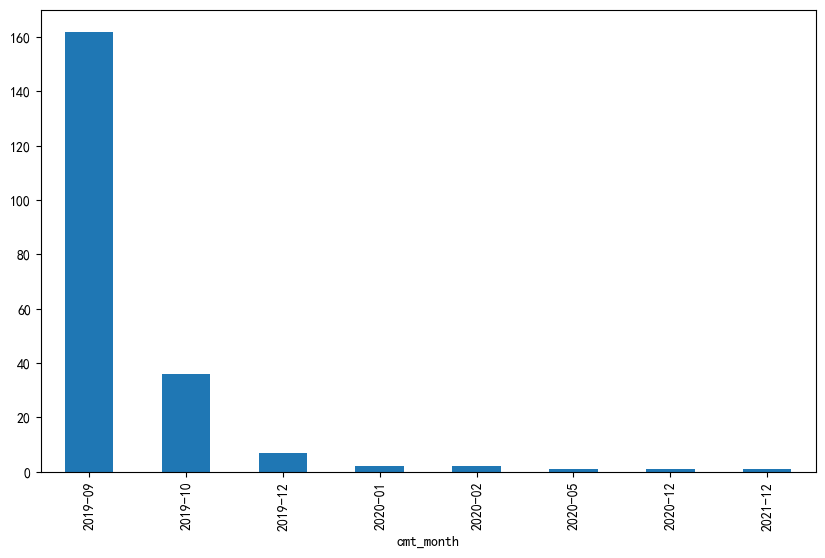

In [140]:
df_a.groupby(['cmt_month']).size().plot.bar(figsize=(10, 6))

### 2.2 标签云图

#### 2.2.1 好评

In [ ]:
import pandas as pd
import jieba
df_h = pd.read_json('data/commet_h.json', lines=True, encoding='utf-8')
df_h.head()

In [ ]:
def mycut(s): return " ".join(jieba.cut(s))

In [ ]:
df_h['cmt_cont'] = df_h['cmt_cont'].apply(mycut)
df_h

In [ ]:
stop = pd.read_csv("data/stoplist.txt", encoding="utf8", header=None, sep="tipdm", engine="python")
# pandas自动过滤了空格，这里手动添加
stop = [" ", ""] + list(stop[0])

In [ ]:
# 定义分割函数，然后用apply进行广播，去掉停用词
df_h['cmt_cont'] = df_h['cmt_cont'].apply(lambda s: s.split(" "))
df_h.head()

In [ ]:
df_h['cmt_cont'] = df_h['cmt_cont'].apply(lambda x: [i for i in x if i not in stop])
df_h.head()

In [ ]:
df_h['cmt_cont'] = df_h['cmt_cont'].apply(lambda x: [i for i in x if len(i) > 1])
df_h.head()

#### 词频统计
统计词频，用标签云展示

In [ ]:
contents = df_h['cmt_cont'].values.tolist()
contents[:10]

In [ ]:
all_words = []
for line in contents:
    for word in line:
        all_words.append(word)
all_words[:10]

In [ ]:
df_all_words = pd.DataFrame({'all_words': all_words})
df_all_words.head()

In [ ]:
import numpy as np

df_all_words.loc[:, 'count'] = 1
words_count = df_all_words.groupby('all_words').agg({"count": 'count'})
# words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({'count':np.size})
words_count = words_count.reset_index().sort_values(by=['count'], ascending=False)
words_count.head()

In [ ]:
word_frequency = {x[0]: x[1] for x in words_count.values}
word_frequency

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', max_font_size=100,scale=16)
word_frequency = {x[0]: x[1] for x in words_count.head(200).values}
wordcloud = wordcloud.fit_words(word_frequency)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 自定义背景图片

In [ ]:
import numpy as np
from PIL import Image

aimask = np.array(Image.open("data/china.png"))

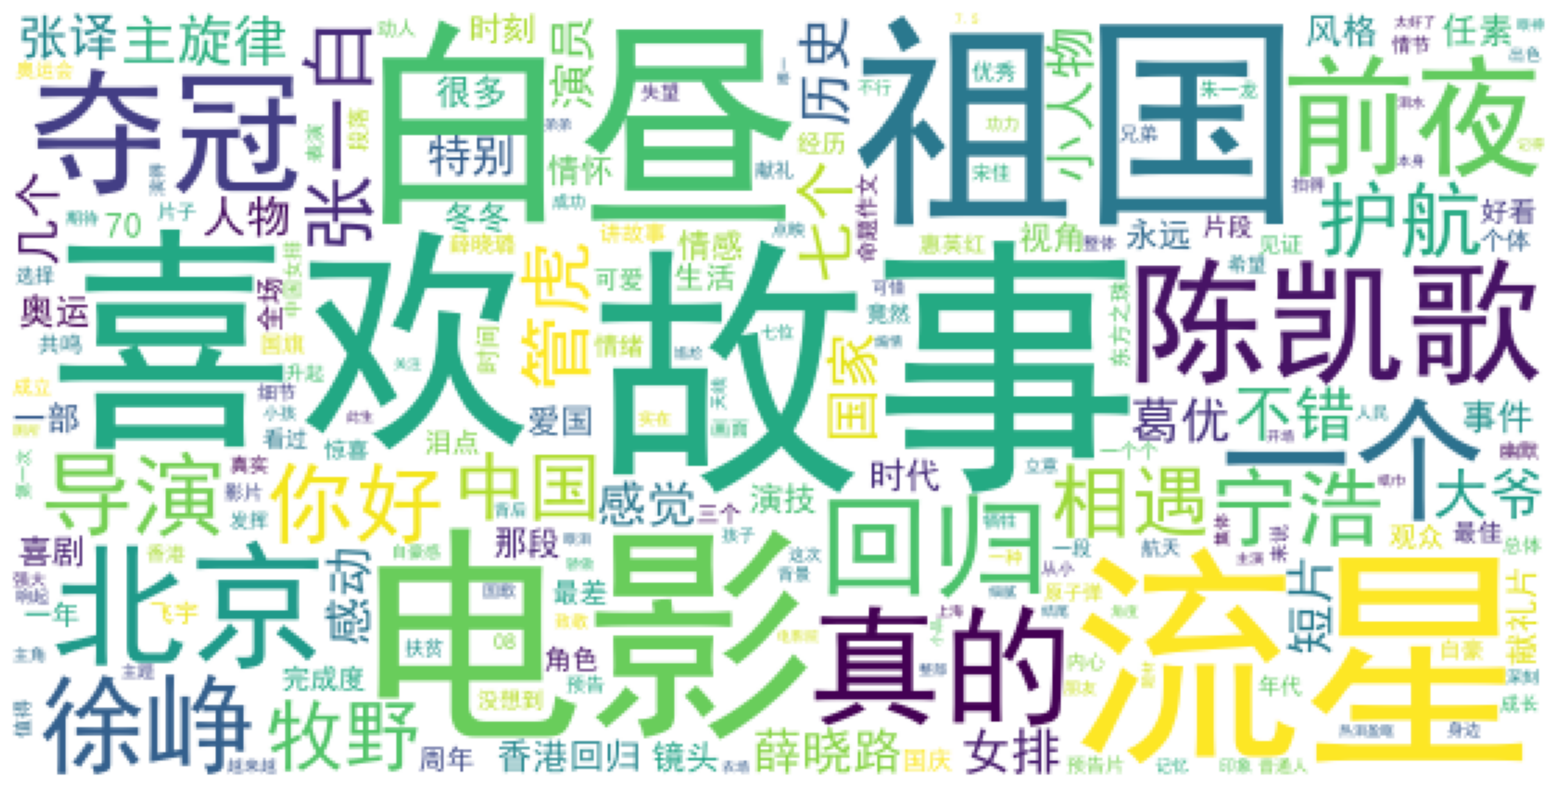

In [141]:
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', max_font_size=100, mask=aimask)
word_frequency = {x[0]: x[1] for x in words_count.head(200).values}
wordcloud = wordcloud.fit_words(word_frequency)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 分析哪一段好

电影分为《前夜》、《相遇》、《夺冠》、《回归》、《北京你好》、《白昼流星》和《护航》七个篇章，每个篇章对应的导演为管虎、张一白、徐峥、薛晓路、宁浩、陈凯歌、文牧野。

In [142]:
#分析具体哪一片段评分较好
hight_movies = {'前夜': 0, '相遇': 0, '夺冠': 0, '回归': 0, '北京你好': 0, '白昼流星': 0, '护航': 0}
for hight_comment in df_h['cmt_cont']:
    for k, v in hight_movies.items():
        if k in hight_comment:
            hight_movies[k] = hight_movies[k] + 1
hight_movies

{'前夜': 45, '相遇': 30, '夺冠': 50, '回归': 41, '北京你好': 0, '白昼流星': 0, '护航': 36}

In [143]:
index = ['前夜', '相遇', '夺冠', '回归', '北京你好', '白昼流星', '护航']
df_movie = pd.DataFrame.from_dict(hight_movies, orient='index', columns=['人数'])
df_movie

,人数
前夜,45
相遇,30
夺冠,50
回归,41
北京你好,0
白昼流星,0
护航,36


<AxesSubplot:>

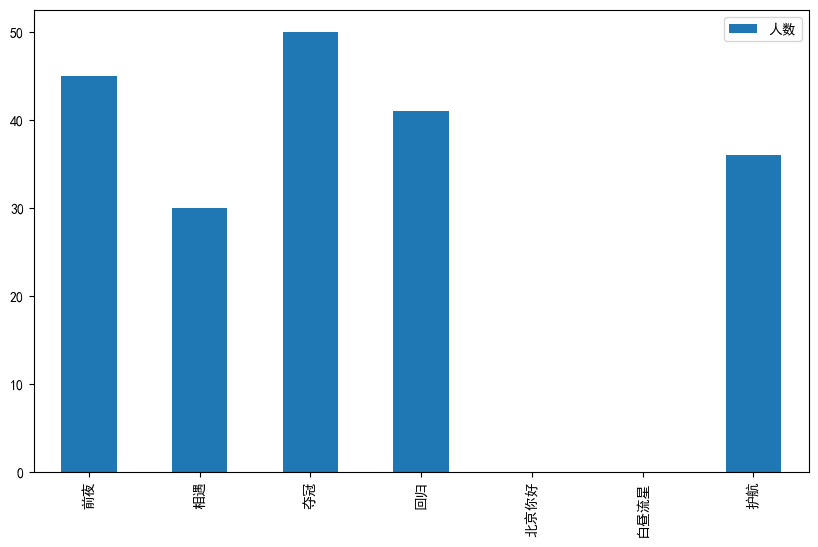

In [144]:
df_movie.plot.bar(figsize=(10, 6))

array([<AxesSubplot:ylabel='人数'>], dtype=object)

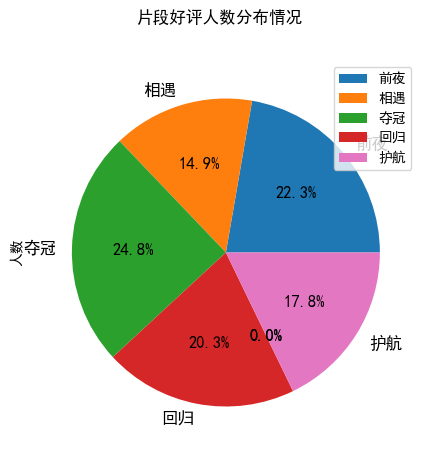

In [146]:
df_movie.plot.pie(title='片段好评人数分布情况', autopct='%.1f%%', fontsize=12, figsize=(5, 5), subplots=True)

In [ ]:
#分析具体哪一片段评分较好
hight_directors = {'管虎': 0, '张一白': 0, '徐峥': 0, '薛晓路': 0, '宁浩': 0, '陈凯歌': 0, '文牧野': 0}
for hight_comment in df_h['cmt_cont']:
    for k, v in hight_directors.items():
        if k in hight_comment:
            hight_directors[k] = hight_directors[k] + 1
hight_directors

#### 2.2.2 差评

In [147]:
df_l = pd.read_json('data/commet_l.json', lines=True, encoding='utf-8')
df_l.head()

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs
0,1975896228,20,2019-09-30 13:17:50,就像什么呢，就像一个小伙子想对女孩表达爱意，有太多的甜言蜜语可讲，而七个小伙儿一拥而上同时表...,2135
1,1974180120,20,2019-09-29 09:01:56,几种价值：\n1.因为我们是中国人，所以我们应该无条件为国家利益放弃所有个人情感。（《相遇》...,264
2,1959243826,20,2019-10-02 00:08:42,如果建国史是一个成年人的话，他是具有深度遗忘症的人，只有童年和中年的记忆，不反思、不回忆。他...,221
3,1976424674,20,2019-09-30 19:46:13,好就好在，是名副其实的“我和我的祖国”，而不仅仅是“我爱我的祖国”。→11.29 只有宁浩人本。,213
4,1973248019,20,2019-09-28 17:31:10,短片集最残酷的点是，主创能力高下立现。谁会讲故事、谁运镜讲究、谁审美怎么样，哪个演员啥都能演...,93


In [148]:
def mycut(s): return " ".join(jieba.cut(s))

In [149]:
df_l['cmt_cont'] = df_l['cmt_cont'].apply(mycut)
df_l.head()

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs
0,1975896228,20,2019-09-30 13:17:50,就 像 什么 呢 ， 就 像 一个 小伙子 想 对 女孩 表达 爱意 ， 有太多 的 甜言蜜...,2135
1,1974180120,20,2019-09-29 09:01:56,几种 价值 ： \n 1 . 因为 我们 是 中国 人 ， 所以 我们 应该 无条件 为 国...,264
2,1959243826,20,2019-10-02 00:08:42,如果 建国 史是 一个 成年人 的话 ， 他 是 具有 深度 遗忘症 的 人 ， 只有 童年...,221
3,1976424674,20,2019-09-30 19:46:13,好 就 好 在 ， 是 名副其实 的 “ 我 和 我 的 祖国 ” ， 而 不仅仅 是 “ ...,213
4,1973248019,20,2019-09-28 17:31:10,短片 集 最 残酷 的 点 是 ， 主创 能力 高下 立现 。 谁 会 讲故事 、 谁 运镜...,93


In [150]:
# 定义分割函数，然后用apply进行广播，去掉停用词
df_l['cmt_cont'] = df_l['cmt_cont'].apply(lambda s: s.split(" "))
df_l.head()

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs
0,1975896228,20,2019-09-30 13:17:50,"[就, 像, 什么, 呢, ，, 就, 像, 一个, 小伙子, 想, 对, 女孩, 表达, ...",2135
1,1974180120,20,2019-09-29 09:01:56,"[几种, 价值, ：, \n, 1, ., 因为, 我们, 是, 中国, 人, ，, 所以,...",264
2,1959243826,20,2019-10-02 00:08:42,"[如果, 建国, 史是, 一个, 成年人, 的话, ，, 他, 是, 具有, 深度, 遗忘症...",221
3,1976424674,20,2019-09-30 19:46:13,"[好, 就, 好, 在, ，, 是, 名副其实, 的, “, 我, 和, 我, 的, 祖国,...",213
4,1973248019,20,2019-09-28 17:31:10,"[短片, 集, 最, 残酷, 的, 点, 是, ，, 主创, 能力, 高下, 立现, 。, ...",93


In [151]:
df_l['cmt_cont'] = df_l['cmt_cont'].apply(lambda x: [i for i in x if i not in stop])
df_l.head()

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs
0,1975896228,20,2019-09-30 13:17:50,"[一个, 小伙子, 想, 女孩, 表达, 爱意, 有太多, 甜言蜜语, 讲, 七个, 小伙儿...",2135
1,1974180120,20,2019-09-29 09:01:56,"[几种, 价值, \n, 1, 中国, 人, 无条件, 国家, 利益, 放弃, 情感, 相遇...",264
2,1959243826,20,2019-10-02 00:08:42,"[建国, 史是, 一个, 成年人, 深度, 遗忘症, 人, 童年, 中年, 记忆, 不, 反...",221
3,1976424674,20,2019-09-30 19:46:13,"[好, 好, 名副其实, 祖国, 不仅仅, 爱, 祖国, →, 11.29, 宁浩人本]",213
4,1973248019,20,2019-09-28 17:31:10,"[短片, 集, 最, 残酷, 点, 主创, 能力, 高下, 立现, 会, 讲故事, 运镜, ...",93


In [152]:
df_l['cmt_cont'] = df_l['cmt_cont'].apply(lambda x: [i for i in x if len(i) > 1])
df_l.head()

,cmt_id,cmt_star,cmt_time,cmt_cont,cmt_thumbs
0,1975896228,20,2019-09-30 13:17:50,"[一个, 小伙子, 女孩, 表达, 爱意, 有太多, 甜言蜜语, 七个, 小伙儿, 一拥而上...",2135
1,1974180120,20,2019-09-29 09:01:56,"[几种, 价值, 中国, 无条件, 国家, 利益, 放弃, 情感, 相遇, 夺冠, 国家, ...",264
2,1959243826,20,2019-10-02 00:08:42,"[建国, 史是, 一个, 成年人, 深度, 遗忘症, 童年, 中年, 记忆, 反思, 回忆,...",221
3,1976424674,20,2019-09-30 19:46:13,"[名副其实, 祖国, 不仅仅, 祖国, 11.29, 宁浩人本]",213
4,1973248019,20,2019-09-28 17:31:10,"[短片, 残酷, 主创, 能力, 高下, 立现, 讲故事, 运镜, 讲究, 审美, 演员, ...",93


## 3. 主题分析

LDA主题分析,分词之后的语义分析，LDA模型分析正面负面情感

### 3.1 正面主题

In [ ]:
# 建立词典
pos_dict = corpora.Dictionary(df_h['cmt_cont'])  #词袋模型，将每个单词编码为整数

In [ ]:
# 建立语料库
pos_corpus = [pos_dict.doc2bow(i) for i in df_h['cmt_cont']]  # bag of word 词袋模型编码

In [ ]:
# LDA模型训练
pos_lda = models.LdaModel(pos_corpus, num_topics=10, id2word=pos_dict)

In [ ]:
# 打印主题
for topic in pos_lda.print_topics(num_words=8):
    print(topic)

### 3.2 负面主题

In [ ]:
# 建立词典
neg_dict = corpora.Dictionary(df_l['cmt_cont'])  #词袋模型，将每个单词编码为整数

In [ ]:
# 建立语料库
neg_corpus = [neg_dict.doc2bow(i) for i in df_l['cmt_cont']]  # bag of word 词袋模型编码

In [ ]:
# LDA模型训练
neg_lda = models.LdaModel(neg_corpus, num_topics=10, id2word=pos_dict)

In [ ]:
# 打印主题
for topic in neg_lda.print_topics(num_words=8):
    print(topic)

## 4. 情感分析

### 4.1 数据预处理

In [ ]:
df_h.head()

In [ ]:
df_l.head()

In [ ]:
data_ = pd.concat([df_h.loc[:, ['cmt_star', 'cmt_cont']], df_l.loc[:, ['cmt_star', 'cmt_cont']]])
data_.head()

In [ ]:
data_.info()

In [ ]:
data_.groupby('cmt_star').count()

In [ ]:
data_["cmt_star"] = data_["cmt_star"].astype(str)

In [ ]:
data_["cmt_star"] = data_['cmt_star'].map({"50": 1, "40": 1, "20": 0, "10": 0})  #数据标签预处理
data_.head()

In [ ]:
data_.groupby('cmt_star').count()

### 4.2 数据集划分

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_["cmt_cont"], data_["cmt_star"], test_size=0.1, random_state=1)
print("训练集: {}".format(X_train.shape[0]))
print("测试集: {}".format(X_test.shape[0]))

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
from keras.preprocessing.text import Tokenizer

max_words = 3000  #最多使用1000单词
max_len = 150  #短信单词长度，酌情填充
tk = Tokenizer(num_words=max_words)  #句子拆单词

In [ ]:
# 创建单词索引
tk.fit_on_texts(X_train)

In [ ]:
# 把单词转换为序列
train_data = tk.texts_to_sequences(X_train)
test_data = tk.texts_to_sequences(X_test)

In [ ]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [ ]:
# 查看训练数据类型以及形状
print(type(train_data))
print(type(train_data[0]))
print(train_data.shape)

In [ ]:
train_labels = np.array(Y_train)
test_labels = np.array(Y_test)

In [ ]:
# 统计文本长度
import numpy as np

text_len_li = list(map(len, train_data))
print("最短文本长度=", min(text_len_li))
print("最长文本长度=", max(text_len_li))
print("平均文本长度=", np.mean(text_len_li))

In [ ]:
import numpy as np


# 定义一个函数，计算one-hot编码
def vectorize_onehot(sequences, dimension=3000):
    results = np.zeros((len(sequences), dimension))  #数据集长度，每个评论维度3000
    for i, sequence in enumerate(sequences):
        sequence = [x - 1 for x in sequence]
        results[i, sequence] = 1  # one-hot
    return results

In [ ]:
# 对数据集one-hot编码
x_train = vectorize_onehot(train_data)
x_test = vectorize_onehot(test_data)

In [ ]:
# 将数据转化为numpy的ndarray，并转化为浮点型
y_train = np.asarray(train_labels).astype('float32')  # 向量化标签数据
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# 查看输入数据内容及形状
print(x_train.shape)
print(len(x_train[0]), x_train[0])
print(len(x_train[1]), x_train[1])

In [ ]:
# 查看输出数据内容及形状
print(y_train.shape)
print(y_train[0])

### 4.3 模型构建与预测

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
gnb.fit(x_train, y_train)
ypred = gnb.predict(x_test)
print(metrics.accuracy_score(ypred, y_test))
print(metrics.f1_score(ypred, y_test, average='macro'))

In [ ]:
df_a.head()

In [ ]:
test_sms = '第三段那个小男孩太棒了	'
test_tokens = " ".join(jieba.cut(test_sms))
test_tokens

In [ ]:
test_seqs = tk.texts_to_sequences([test_tokens])
test_seqs

In [ ]:
test_vecs = vectorize_onehot(test_seqs)
test_vecs

In [ ]:
gnb.predict(test_vecs)[0]

思考：深度方法如何实现？

## 小结

#### 1. 数据抓取
* 多页文本数据
* 请求参数构造
* 自动反爬设置

#### 2. 数据分析
* 评分统计
* 标签云图
* 主题分析
* 情感分析